# Machine Learning - Multiple Linear Regression

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\szerp\anacoda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("../Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
X = df.drop('koi_disposition', axis=1)

Use `koi_disposition` for the y values

In [6]:
# Setting y vals
y = df['koi_disposition'] 

In [7]:
print(X.shape)
print(y.shape) # research on the y-shape results, gave issues when I loaded it with double brackets

(6991, 40)
(6991,)


# Data Preprocessing

In [8]:
# Conversions for non-numeric datalinear regression...

# Import label encoding for categorical data in y/target
from sklearn.preprocessing import LabelEncoder

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [9]:
# Print unique y values
print(y.unique())

['CONFIRMED' 'FALSE POSITIVE' 'CANDIDATE']


In [10]:
# Checked first 30 encoded y vals
counter = 0
for label, original_class in zip(encoded_y, y):
    if counter < 30:
        counter += 1
        print('Original Class: ' + str(original_class))
        print('Encoded Label: ' + str(label))
        print('-' * 12)
    else:
        break

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CO

In [11]:
# Check for reshape need
encoded_y.shape

(6991,)

In [12]:
# Reshape encoded target/y column
y = encoded_y.reshape(-1, 1)
print(y.shape)

(6991, 1)


In [13]:
print(y)

[[1]
 [2]
 [2]
 ...
 [0]
 [2]
 [2]]


In [21]:
# Updated y/target values to binary categorical values
from tensorflow.keras.utils import to_categorical 
y = to_categorical(y)
print (y)

[[[1. 0.]
  [0. 1.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]]

 ...

 [[0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]]]


## Create a Train Test Split

In [15]:
# Create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


In [17]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaler = scaler.fit(X)

In [18]:
X_train_scaled = features_scaler.transform(X_train)
X_test_scaled = features_scaler.transform(X_test)

# Build the Model

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the Model



In [23]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

# Provide R2 Scores
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5281682400153084
Testing Score: 0.5097996431553076


C:\Users\szerp\Anacoda3\envs\PythonData\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\szerp\Anacoda3\envs\PythonData\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses mu

Text(0.5, 1.0, 'Residual Plot')

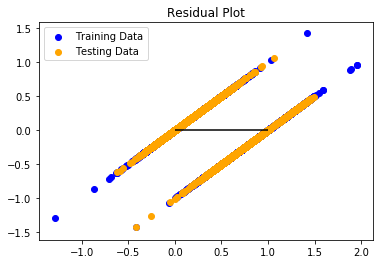

In [29]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [30]:
# predictions = model.predict(X)
# # Plot Residuals
# plt.scatter(predictions, predictions - y)
# # plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
# plt.show()

ValueError: operands could not be broadcast together with shapes (6991,3) (6991,3,2) 

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)